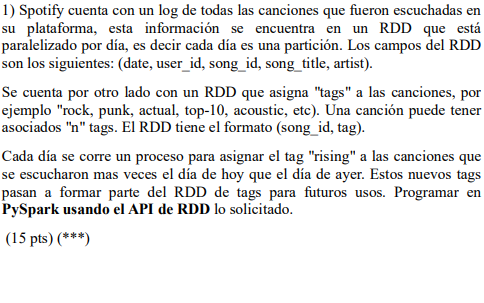

In [1]:
data1 = [
    ("2018-08-12",2,1,"c1","a1"),
    ("2018-08-12",2,1,"c1","a1"),
    ("2018-08-12",2,1,"c1","a1"),
    ("2018-08-12",2,1,"c1","a1"),
    ("2018-08-11",2,1,"c1","a1"),
    ("2018-08-11",2,1,"c1","a1"),
    ("2018-08-12",2,1,"c1","a1"),
    ("2018-08-12",2,3,"c1","a1"),
    ("2018-08-11",2,2,"c1","a1"),
    ("2018-08-12",2,2,"c1","a1"),
    ("2018-08-11",2,4,"c1","a1"),
    ("2018-08-12",2,4,"c1","a1"),
    ("2018-08-11",2,4,"c1","a1"),
    ("2018-08-11",2,4,"c1","a1"),
]
data2 = [
    (1,"tag"),
    (1,"tag1"),
    (1,"tag2"),
    (1,"tag3"),
    (1,"tag4"),
    (2,"tag"),
    (2,"tag"),
    (2,"tag"),
    (3,"tag"),
    (4,"tag"),
    (3,"tag2"),
    (1,"tag"),
    (1,"tag")
]

In [2]:
# canciones (date, user_id, song_id, song_title, artist).
rdd1= sc.parallelize(data1)

rdd2= sc.parallelize(data2)
# tags (song_id, tag).

In [3]:
rdd1 = rdd1.map(lambda x: ( (x[2],x[0]),1 ) )
# (song_id,date) , 1

In [4]:
rdd1 = rdd1.reduceByKey(lambda x,y: x+y)
# (song_id,date) , reproduc total por dia

In [5]:
def dia_anterior(x):
#Faltaria cambiar el mes y el año pero paja
    dia=int(x[8:])
    return x[:8]+str(dia-1)

dia_anterior("2018-08-11")

'2018-08-10'

In [6]:
rdd1 = rdd1.flatMap(lambda x: [ ( (x[0][0], dia_anterior(x[0][1]) ), x[1] ),
                                ( (x[0][0], x[0][1] ), x[1] )])
# (song_id,date_vieja) , reproduc total por dia
# (song_id,date_nueva) , reproduc total por dia

In [7]:
rdd1 = rdd1.groupByKey().mapValues(list)
# (song_id,date) , (Reprod_dia_hoy, reprod_dia_ayer)

In [8]:
rdd1 = rdd1.filter(lambda x: len(x[1])==2 and x[1][0]>x[1][1] )
rdd1.collect()

[((1, '2018-08-11'), [5, 2])]

In [9]:
rdd1 = rdd1.map(lambda x: (x[0][0],"rising") )

In [10]:
rdd2 = rdd2.union(rdd1)

In [11]:
rdd2.collect()

[(1, 'tag'),
 (1, 'tag1'),
 (1, 'tag2'),
 (1, 'tag3'),
 (1, 'tag4'),
 (2, 'tag'),
 (2, 'tag'),
 (2, 'tag'),
 (3, 'tag'),
 (4, 'tag'),
 (3, 'tag2'),
 (1, 'tag'),
 (1, 'tag'),
 (1, 'rising')]